# *** Project Steps Summary with Results***

- **Import Libraries:**
  - Necessary libraries (`pandas`, `numpy`, `re`, etc.) were imported.

- **Load Datasets:**
  - `Fake.csv` and `True.csv` datasets were uploaded and loaded.

- **Data Preparation:**
  - Target labels were added: fake news as `0` and real news as `1`.
  - Datasets were combined, unnecessary columns were dropped, and the dataset was shuffled.

- **Text Preprocessing:**
  - A function was defined to clean the text (converted to lowercase, URLs, HTML tags, punctuation removed).

- **Split Dataset:**
  - Features (`X`) and labels (`y`) were separated; dataset was split into 75% training and 25% testing.

- **Vectorization:**
  - TF-IDF vectorization was applied to the text data.

- **Models Initialized:**
  - Four machine learning models were initialized: Logistic Regression, Decision Tree, Gradient Boosting, and Random Forest.

- **Model Training and Evaluation:**
  - Each model was trained and evaluated, yielding the following accuracies:
    - Logistic Regression: **0.99**
    - Decision Tree: **1.00**
    - Gradient Boosting: **1.00**
    - Random Forest: **0.98**

- **Manual Testing Function:**
  - A function was defined for testing news articles.

- **Example for Manual Testing:**
  - An input article claimed to be biodegradable; predictions were made:
    - Logistic Regression: **Fake**
    - Decision Tree: **Fake**
    - Gradient Boosting: **Fake**
    - Random Forest: **Fake**

- **Accuracy Results Visualization:**
  - Accuracy results were plotted for model comparison.  

In [ ]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score



In [ ]:
# Loading dataset
from google.colab import files
uploaded = files.upload()

Saving Fake.csv to Fake.csv


In [ ]:
# Loading dataset
from google.colab import files
uploaded = files.upload()

Saving True.csv to True.csv


In [ ]:
# Load datasets
fake_data = pd.read_csv('Fake.csv')
true_data = pd.read_csv('True.csv')
fake_data.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:

# Add target column
fake_data['label'] = 0  # Fake news
true_data['label'] = 1  # Real news

# Combine datasets
data = pd.concat([fake_data, true_data], axis=0)
data = data.drop(['title', 'subject', 'date'], axis=1)

# Shuffle dataset
data = data.sample(frac=1).reset_index(drop=True)

In [ ]:
# Preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove square brackets and their contents
    text = re.sub(r'\[.*?\]', '', text)
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>+', '', text)
    # Remove punctuation
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    # Remove newline characters
    text = re.sub(r'\n', '', text)
    return text

# Apply preprocessing
data['text'] = data['text'].apply(preprocess_text)

In [ ]:

# Split dataset into features (X) and labels (y)
X = data['text']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# Vectorization using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
# Initialize machine learning models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier()
}


In [ ]:

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, predictions))

Logistic Regression Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5891
           1       0.98      0.99      0.99      5334

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225

Decision Tree Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5891
           1       1.00      1.00      1.00      5334

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225

Gradient Boosting Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5891
           1       0.99      1.00      1.00      5334

    accuracy                           1.00     11225
   macro avg       1.00      1.

In [ ]:
# Define manual testing function
def manual_testing(news):
    cleaned_news = preprocess_text(news)
    vectorized_news = vectorizer.transform([cleaned_news])

    print("\nManual Testing Results:")
    for model_name, model in models.items():
        prediction = model.predict(vectorized_news)
        result = 'Not Fake' if prediction[0] == 1 else 'Fake'
        print(f"{model_name} Prediction: {result}")

In [ ]:
# Example for manual testing
user_input = input("Enter the news article text to test if it is fake or not: ")
manual_testing(user_input)

Enter the news article text to test if it is fake or not: Scientists Create Biodegradable Paper Battery Powered By Water

Manual Testing Results:
Logistic Regression Prediction: Fake
Decision Tree Prediction: Fake
Gradient Boosting Prediction: Fake
Random Forest Prediction: Fake


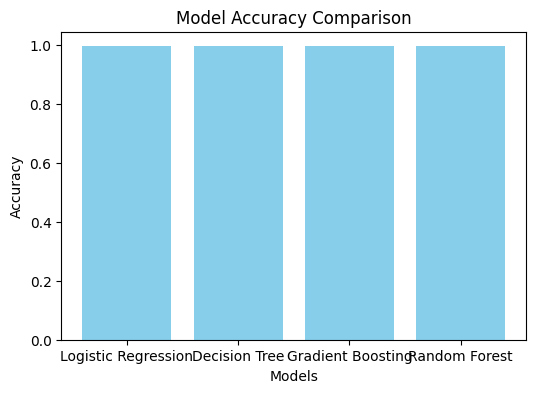

In [ ]:
# Accuracy results for each model
model_names = list(models.keys())
accuracies = []
accuracies.append(accuracy)

# Plotting the accuracy
plt.figure(figsize=(6, 4))
plt.bar(model_names, accuracies, color='skyblue')

plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.show()